### <div style="width:100%;height:60px">
<div style="width:60%;height:50px;float:left;"><h2> Information Theory  (UAI/500) </h2></div>
<div style="width:40%;height:50px;float:left;"><img src="img/JCU_DCS.png" width=200px align=right/> </div>
</div>
<div style="width:100%;height:5px;background-color:#408d62"></div>
<h2>Lecture Notebook</h2>

<h4>Lecturer: Ivo Bukovsky</h4>

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>


<h2> Information, Entropy</h2>
<ul>
<li> Shannon information measure (section 2.4 in [1])</li>
<li> Entropy </li>
</ul>

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>

Let's have a discrete random variable $y$ as follows:

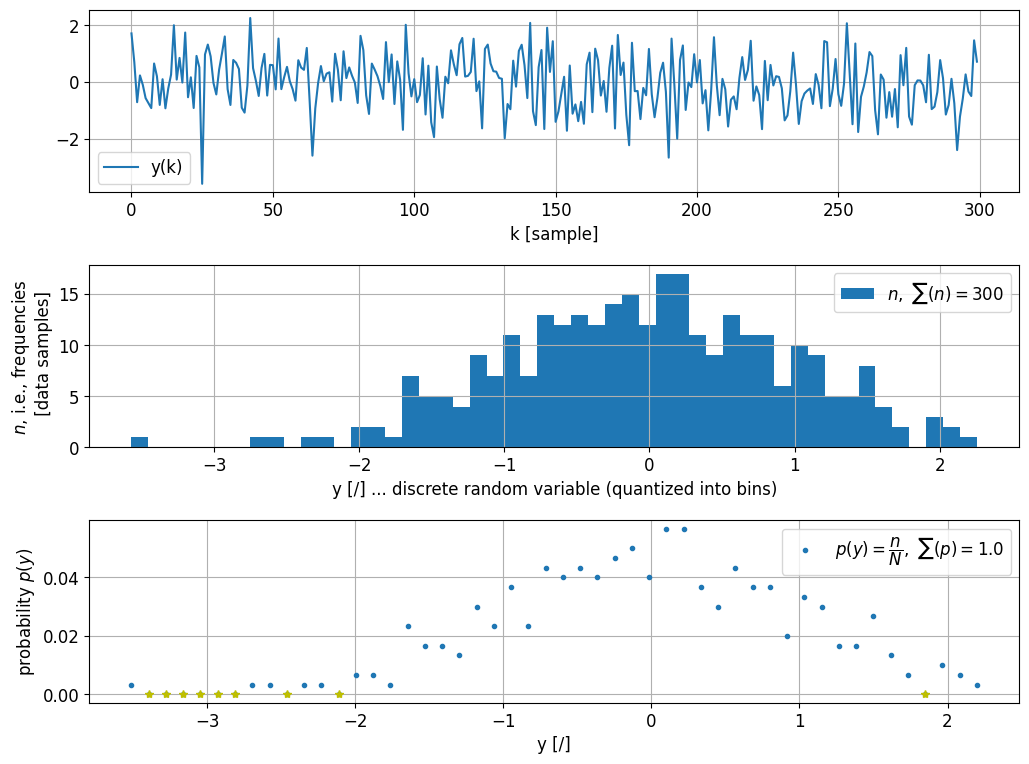

In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
rcParams.update({'font.size': 12})

#======
N=300
y=random.randn(N)

#histogram setup
n_bins=50

figure(figsize=(12,9))
subplots_adjust(hspace=.4)
subplot(311)
plot(y,label=("y(k)"));xlabel("k [sample]");grid();legend();
subplot(312)
hist(y,bins=n_bins,label="$n , \ \sum(n)=$"+str(N));xlabel("y [/] ... discrete random variable (quantized into bins)");grid();ylabel("$n$, i.e., frequencies \n [data samples]");legend()
subplot(313)
n,bin_boundaries=histogram(y,bins=n_bins)
bin_centers = array([mean(bin_boundaries[k:k+2]) for k in range(n_bins)])
bin_width=bin_boundaries[1]-bin_boundaries[0]
p=n/N
plot(bin_centers,p,'.',label="$p(y)=\dfrac{n}{N} , \ \sum(p)=$"+str(round(sum(p),2)));xlabel("y [/]");grid();ylabel("probability $p(y)$");legend()
plot(bin_centers[n==0],p[n==0],'*y')
show()

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>

<h2> Information, Entropy</h2>

<h3> Shannon information measure </h3>

According to Shannon’s probabilistic approach,<b> the information content of an outcome $y$ </b> (section 2.4 in [1]), i.e. the amount of self-information that the data sample can provide to an observer, corresponds to its inverse probability, i.e., rarely observed values carries more information, as follows
<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $h(y)=I(y)\approx\dfrac{1}{p(y)}$,</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(1)</div>
</div>

where both $I$ and $h$ stands for information of the data sample $y$ in Shannon's sense ($h$ is notation from [1]), and $y$ is the discrete random variable.

Further, I will use $I$ or $h$ interchangeably and just the word "information" for brevity.


"Data sample value" = assigned to its bin (as in the histogram) =quantized, see the graphs and the code above.

Because of divison by small values close to zero results in the exponential span of information value by (1), or more exactly, the linear change of probability causes exponential change of information in (1), so it is wise to linearize this relationship by using the logarithm, so you know the information definition as follows  

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $h(y)=I(y)=log_2\left(\dfrac{1}{p(y)}\right)=-log_2\big(p(y)\big) \ [bit]$,</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(2)</div>
</div>

where other logarithms can be used in principle as well.

Notice, that the conventions for working with $p=0 $ when calculating information and entropies are that

<div style="width:100%;height:80px;margin-top:20px">
    <div style="width:90%;height:80px;float:left;text-align:center">
    $log \left( \dfrac{1}{p=0} \right)=0$ ,
        <br> <br>
    $-log \left( p=0\right)=0$.</div>
    <div style="width:10%;height:80px;padding:30px 0 0 0;float:left;text-align:right">(3)</div>
</div>
   
#### Information and its Units
 Depending on the logarithm, but in principal, any logarithm can be used - if there is a reason (?)...
 See the next code and graphs
                                                                   

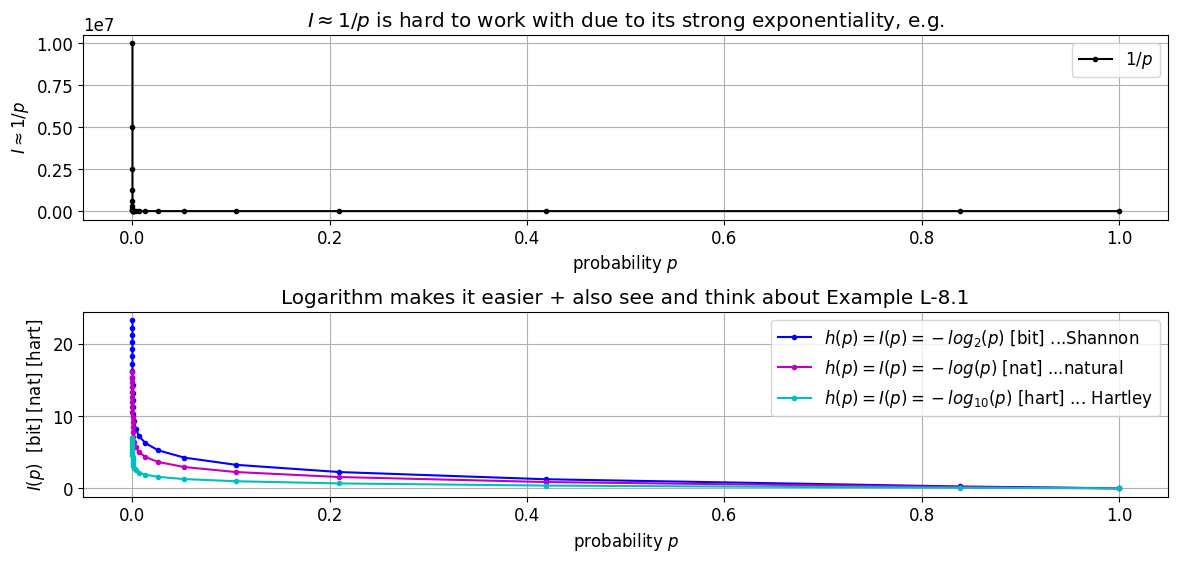

In [2]:
p=[1e-7*2**k for k in range(0,int(log(1e7)/log(2))+1)]
p.append(1)
p=array(p)
figure(figsize=(14,6))
subplots_adjust(hspace=.5)
subplot(211)
plot(p,1/p,'.-k',label="$1/p$");title("$I\\approx 1/p$ is hard to work with due to its strong exponentiality, e.g.");legend();grid();xlabel("probability $p$ ");ylabel("$I\\approx 1/p$")
subplot(212)
title("Logarithm makes it easier + also see and think about Example L-8.1" )
plot(p,log(1/p)/log(2),'.-b',label="$h(p)=I(p)= -log_2(p)$ [bit] ...Shannon");legend();grid();xlabel("probability $p$")
plot(p,log(1/p),'.-m',label="$h(p)=I(p)= -log(p)$ [nat] ...natural");legend();grid();xlabel("probability $p$")
plot(p,log(1/p)/log(10),'.-c',label="$h(p)=I(p)= -log_{10}(p) $ [hart] ... Hartley");legend();grid();xlabel("probability $p$");ylabel("$I(p)$  [bit] [nat] [hart]")
show()

<div style="widht:100%;height:2px;background-color:#408d62"></div>

### Example L-8

Consider a number of logs into a system per minute be a random variable $y \ \text{[ logs into system per minute]}$ . Let's define the number of bins for a histogram to be $n_{bins}=2^{10}=1024$.
<ol>    
    <li>Assume that $p(y)$ for $y\in\langle0,y_{max}\rangle$ where $y_{max}=10\ 000$, and that $y$ has a uniform probability distribution,i.e., the probability for any number of logs per minute into a system is equal: <br>
        - write the formula for the probability mass function, i.e. $p(y)=?$ <b style="color:blue;">[0.1 Points]</b>
        <br>
        - how much information in bits is in every recorded value of $y$?  <b style="color:blue;">[0.1 Points]</b><br>
        - if an analog-to-digital converter in some data acquisition system (DAQ)  has its resolution 24 bits, and assuming the measured variable has a uniform distribution, how much information every data sample obtained by DAQ have in bits?<b style="color:blue;">[0.1 Points]</b></li>
    <hr>
    <li> Assume that $y$ has a normal (Gaussian) probability distribution $N(\overline{y},\sigma_y)$, where the mean value  $\overline{y}=5000$ and standard deviation $\sigma_y=1000$ : <br>
        - write mathematicaly the probability density function, i.e., as for a continuous random variable, $f(y)=?$ <b style="color:blue;">[0.1 Points]</b>
        <br>
        - calculate and draw the probability mass function $p(y)$ (for discrete random variable) $y\in\langle0,y_{max}=10 \ 000\rangle$ for $n_{bins}=1024$.<b style="color:blue;">[0.1 Points]</b><br>
        - calculate and plot the graph showing how much information in bits is in every recorded value of $y$  <b style="color:blue;">[0.1 Points]</b> </li> </li>
</ol>

<div style="widht:100%;height:2px;background-color:#408d62"></div>



In [3]:
import math
" 1) A) write the formula for the probability mass function, i.e.  p(y)"
"""For a uniformly distributed discrete random variable y over the range y∈⟨0,ymax⟩, where ymax = 10,000, the probability mass function (PMF) p(y)
    represents the probability of observing each specific value of y.
    Since y is uniformly distributed across this range, each value has an equal probability. If we divide the range ⟨0,ymax⟩ into n discrete values (or bins),
    and y can take any of these values with equal likelihood, then the probability p(y) for each bin is: p(y)= 1/n where n is the total number of bins."""

y_max = 10000
nbins = 2**10

p_y = 1/y_max
print("Probability mass fucntion of p(y) for y ∈ ⟨0, {y_max}⟩:",{p_y})


"""B) how much information in bits is in every recorded value of  y ?"""
py = 1/y_max
I = -math.log2(py)

print(f"\n Information content per recorded value of y: {I} bits")

""" C) if an analog-to-digital converter in some data acquisition system (DAQ) has its resolution 24 bits,
      and assuming the measured variable has a uniform distribution, how much information every data sample obtained by DAQ have in bits?
      """

adc_resolution_bits = 24

distinct_values = 2 ** adc_resolution_bits

probability_per_value = 1 / distinct_values

# Calculate the information content per sample in bits
information_content_bits = -math.log2(probability_per_value)

print(f"\n Distinct values (2^{adc_resolution_bits}): {distinct_values}")
print(f"Probability per value: {probability_per_value}")
print(f"Information content per sample: {information_content_bits} bits")

Probability mass fucntion of p(y) for y ∈ ⟨0, {y_max}⟩: {0.0001}

 Information content per recorded value of y: 13.287712379549449 bits

 Distinct values (2^24): 16777216
Probability per value: 5.960464477539063e-08
Information content per sample: 24.0 bits


Probability density f(y) at y: 0.0003989422804014327


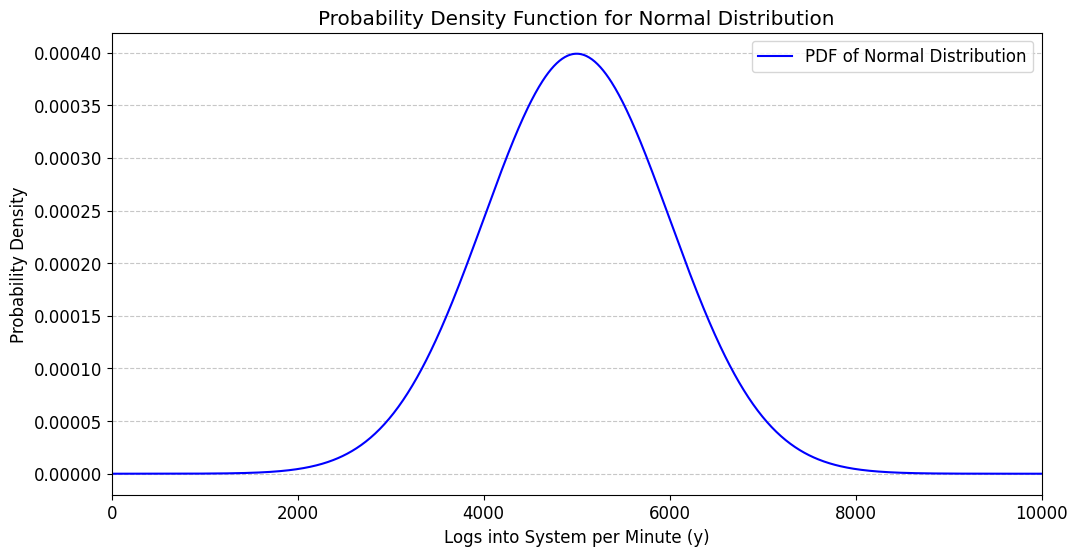

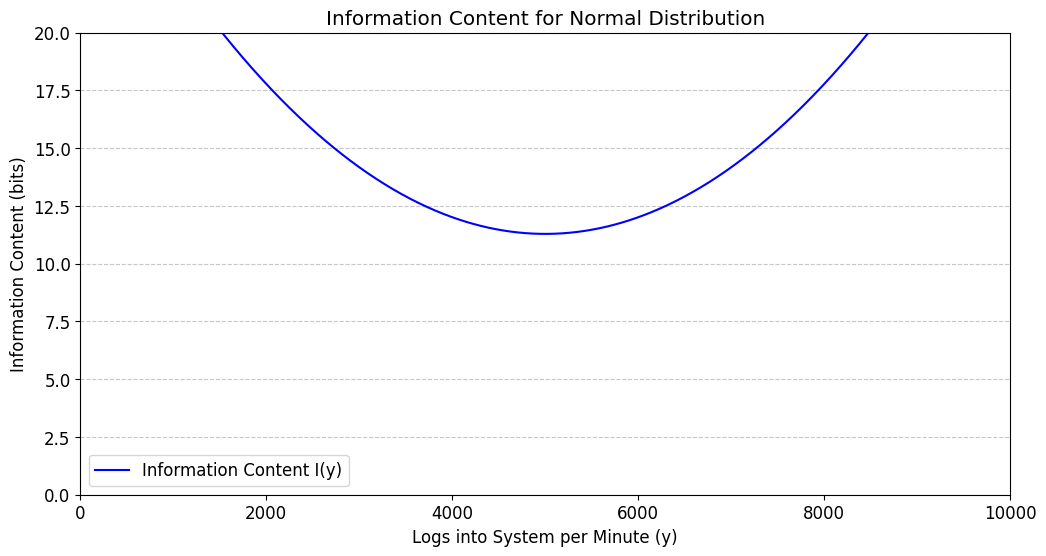

In [4]:
"""2) A)  Assume that  y  has a normal (Gaussian) probability distribution  N(y¯¯¯,σy) , where the mean value  y¯¯¯=5000  and standard deviation  σy=1000  :
        write mathematicaly the probability density function, i.e., as for a continuous random variable,  f(y)=? """

from scipy.stats import norm

y_mean = 5000        # Mean of y
sigma_y = 1000       # Standard deviation of y

# Define a normal distribution with specified mean and standard deviation
normal_dist = norm(loc=y_mean, scale=sigma_y)

y_value = 5000
pdf_at_y = normal_dist.pdf(y_value)

print(f"Probability density f(y) at y: {pdf_at_y}")



""" B) calculate and draw the probability mass function  p(y)  (for discrete random variable)  y∈⟨0,ymax=10 000⟩  for  nbins=1024 """

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

y_mean = 5000        # Mean of y
sigma_y = 1000       # Standard deviation of y

# Generate y values over the range of interest
y_values = np.linspace(0, 10000, 1000)  # 1000 points between 0 and 10,000

# Calculate the probability density function for the normal distribution
pdf_values = norm.pdf(y_values, loc=y_mean, scale=sigma_y)

# Plot the probability density function
plt.figure(figsize=(12, 6))
plt.plot(y_values, pdf_values, color='blue', label='PDF of Normal Distribution')
plt.title('Probability Density Function for Normal Distribution')
plt.xlabel('Logs into System per Minute (y)')
plt.ylabel('Probability Density')
plt.xlim(0, 10000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

"""C) calculate and plot the graph showing how much information in bits is in every recorded value of  y"""

information_content_bits = -np.log2(pdf_values)

# Plot the information content as a function of y
plt.figure(figsize=(12, 6))
plt.plot(y_values, information_content_bits, color='blue', label='Information Content I(y)')
plt.title('Information Content for Normal Distribution')
plt.xlabel('Logs into System per Minute (y)')
plt.ylabel('Information Content (bits)')
plt.xlim(0, 10000)  # Limit x-axis to 0 to 10,000
plt.ylim(0, 20)     # Set y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


<h3> Entropy</h3>

The Shannon's <b>entropy</b> is defined as the average information contentas follows

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $H(\textbf{y})=H(\textbf{p})=\sum\limits_{\forall y}p(y)\cdot I(y)=-\sum\limits_{\forall y}p(y)\cdot log_2 \big( p(y)\big)$ [bit].</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(4)</div>
</div>

For two (or more) random variables, e.g. $x(k), y(k)$ where $k$ is the index of data sample, and where $[x(k),y(k)]$ is an outcome of $k$-th observation, the <b>joint entropy</b> is given as

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $H(\textbf{x},\textbf{y})=H(\textbf{p}(x,y))=\sum\limits_{\forall x,y}p(x,y)\cdot I(x,y)=-\sum\limits_{\forall x,y}p(x,y)\cdot log_2 \big( p(x,y)\big)$ [bit].</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(5)</div>
</div>


Similarly, the <b>conditonal entropy</b> is given as

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $H(\textbf{y}|x)=H(\textbf{p}(y|x))=-\sum\limits_{\forall y}p(y|x)\cdot log_2 \big( p(y|x)\big)$ [bit],</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(6)</div>
</div>

where $x$ in (6) is a single value of the random variable $x$ that is allready given (the notiation is simplified, please see subsection 2.4 in [1] for proper details and further).

![image-2.png](attachment:image-2.png)
<center> Fig 2: The horizontal axes are $k$, such as a data samples index or the index of time stamps.</center>

# <div style="widht:100%;height:2px;background-color:#408d62"></div>

### Example L-9

Let's play with some random distributions (you may need to utilize reference [$\alpha$]).
<ol>
<li>Generate dataset $\textbf{x}$ for $N=10\ 000$ samples of random variable $x$ with Normal (Gaussian) distribution whose majority of data, i.e. theoretically more than 99.7% of sample, lie within the interval $x\in\langle -3,3  \rangle$. Plot the data points, plot the histogram (for some number of bins that you appropriately estimate, i.e., you may use [g], but do not have to here, just estimate $n_{bins}$ and draw the histogram if it looks ok = as the Gaussian bell shape),plot the probabilities $p(x)$ of your dataset $\textbf{x}$, and calculate the Shannon entropy of this dataset<b style="color:blue;"> [0.6 Points]</b></li>
    <hr>
    <li>There are 100 similar network devices who are all periodically checked in batch for their status, i.e., all the devices were checked $10\ 000$-times, like about more than $330$-times every day during one month. The status of every single device can be "OK" or "NOK". The probability that a device is found "NOK" during the check is $q$. Let's introduce random variable $x$ that is the count of "NOK" devices during a single check: <br><br>
       - what is the probability distribution of random variable $x$, what values and in what range can $x$ be? <b style="color:blue;">[0.1 Points]</b><br><br>
       - generate dataset $\textbf{x}$ for $N=10\ 000$ values of random variable $x$ for $q=0.01$, i.e., here it simulates the results of $10\ 000$ check batches, plot $x=x(k), \ k=1,2,3,...,N$, ($k$ represents the index of a check) plot the histogram of your data, calculate and plot probabilities $p(x)$, calculate the entropy of dataset $H(\textbf{x})$. <b style="color:blue;">[0.6 Points]</b> <br>
        <i style="color:blue">Notice:  $p\ne 1-q$  </i>
        <br><br>
        -For the above example, i.e. 100 devices and $N=10\ 000$, write down the mathematical formula for probability mass function of $x$ as a function of "NOK" probability $q$, i.e. $p(x(q))=p\big((x|q)\big)=?$ Then derive and write down the formula for Shannon entropy of $\textbf{x}$ as a function of $q$, i.e., $H(\textbf{x}|q)=?$ (present your whole derivation, though it is short), calculate and plot $H\big(\textbf{x}(q)\big)=H(\textbf{x}|q)$ [bit]. <b style="color:blue;">[0.8 Points]</b><br><br>
<li> Let's denote $n$ the number of network devices, and where $x$ is the count of "NOK" devices during a single check batch. Let's imagine that the probability of $x$ is a constant (i.e. $x$ has the uniform distribution): <br>
    - How much is $p(x)$ and how much is $H(\textbf{x})$ [bit] for $n$ in general?<b style="color:blue;">[0.3 Points]</b><br>
    - Derive and plot the Shannon entropy of the uniform distribution as function of the number of the devices $n$, i.e,plot $H(p(n))$ for $n=1,2,3,4,...,100$.<b style="color:blue;">[0.3 Points]</b>
    </li>
    
</ol>

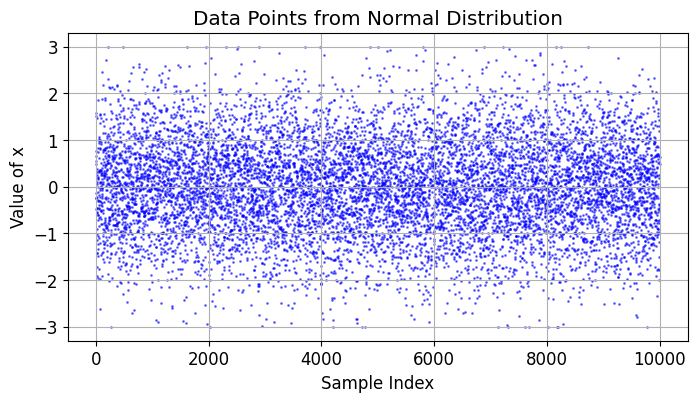

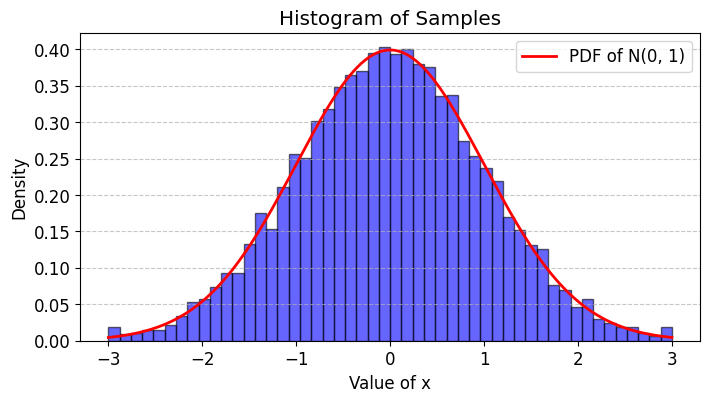

Shannon Entropy of the dataset: 3.5326


In [5]:
"""Generate dataset  x  for  N=10 000  samples of random variable  x  with Normal (Gaussian) distribution whose majority of data,
    i.e. theoretically more than 99.7% of sample, lie within the interval  x∈⟨−3,3⟩ . Plot the data points, plot the histogram
    (for some number of bins that you appropriately estimate, i.e., you may use [g], but do not have to here, just estimate  nbins
    and draw the histogram if it looks ok = as the Gaussian bell shape),plot the probabilities  p(x)  of your dataset  x ,
    and calculate the Shannon entropy of this dataset import numpy as np"""


import matplotlib.pyplot as plt
from scipy.stats import norm, entropy as shannon_entropy

# Set the random seed for reproducibility
np.random.seed(42)

# Generate dataset from a normal distribution
N = 10000
mu = 0
sigma = 1
x = np.random.normal(mu, sigma, N)

# Clip the values to ensure they lie within the interval [-3, 3]
x = np.clip(x, -3, 3)

# Plot the data points
plt.figure(figsize=(8, 4))
plt.scatter(range(N), x, s=1, alpha=0.5, color='blue')
plt.title('Data Points from Normal Distribution')
plt.xlabel('Sample Index')
plt.ylabel('Value of x')
plt.grid()
plt.show()

# Plot the histogram
nbins = 50  # Estimate the number of bins for the histogram
plt.figure(figsize=(8, 4))
hist, bin_edges = np.histogram(x, bins=nbins, density=True)
plt.hist(x, bins=nbins, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Histogram of Samples')
plt.xlabel('Value of x')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot the probability density function
y_values = np.linspace(-3, 3, 1000)
pdf_values = norm.pdf(y_values, mu, sigma)
plt.plot(y_values, pdf_values, color='red', linewidth=2, label='PDF of N(0, 1)')
plt.legend()
plt.show()

# Calculate Shannon entropy using the histogram probabilities
p_x = hist[hist > 0]  # Keep only non-zero probabilities

# Normalize the probabilities to ensure they sum to 1
p_x_normalized = p_x / np.sum(p_x)

# Calculate Shannon entropy
entropy = shannon_entropy(p_x_normalized)

# Display Shannon entropy
print(f'Shannon Entropy of the dataset: {entropy:.4f}')


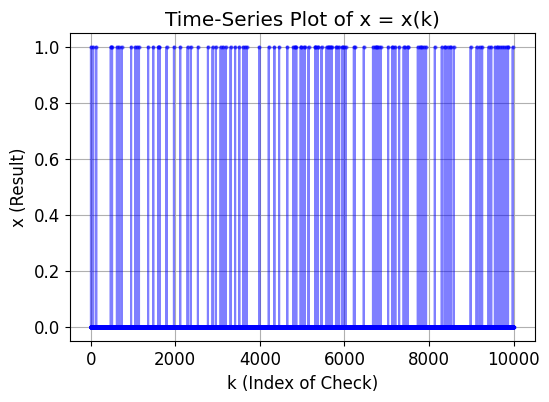

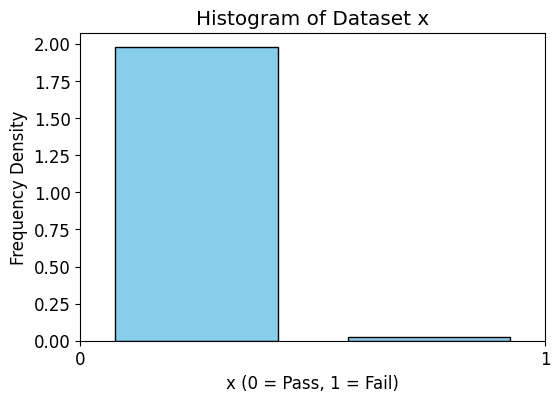

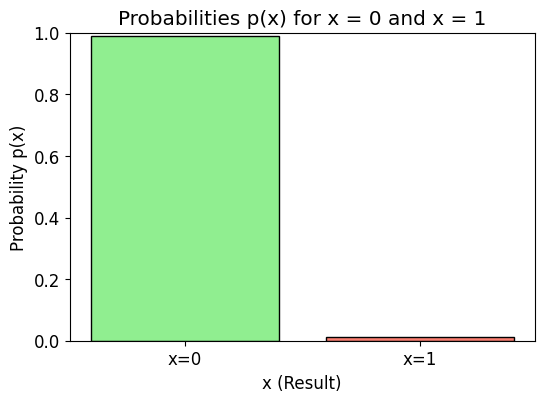

Entropy H(x): 0.09250278173674933


In [13]:
"""2) There are 100 similar network devices who are all periodically checked in batch for their status, i.e., all the devices were checked  10 000 -times,
      like about more than  330 -times every day during one month. The status of every single device can be "OK" or "NOK". The probability that a device is found "NOK"
      during the check is  q . Let's introduce random variable  x  that is the count of "NOK" devices during a single check:
    A)what is the probability distribution of random variable  x , what values and in what range can  x  be?

    Probability Distribution of Random Variable  x  is Binomial Distribution.
    x can take any integer value from 0 to n and since there are 100 devices, the possible values of x are: x∈{0,1,2,…,100}
    The probability mass function (PMF) for a binomially distributed random variable x is given by P(X=k)=(nCk)⋅(q^k)⋅((1−q)^(n−k))"""

"""B) Generate dataset  x  for  N=10 000  values of random variable  x  for  q=0.01 , i.e., here it simulates the results of  10 000  check batches,
      plot  x=x(k), k=1,2,3,...,N , ( k  represents the index of a check) plot the histogram of your data, calculate and plot probabilities  p(x) ,
      calculate the entropy of dataset  H(x) . [0.6 Points]
      Notice:  p≠1−q """

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

N = 10000  # Number of values
q = 0.01  # Probability of failure (x = 1)

# dataset x with probabilities: P(x=1)=q, P(x=0)=1-q
x = np.random.choice([0, 1], size=N, p=[1 - q, q])

# Plot x as a function of k (time-series plot)
plt.figure(figsize=(6, 4))
plt.plot(range(1, N + 1), x, marker='o', markersize=2, linestyle='-', color='blue', alpha=0.5)
plt.title("Time-Series Plot of x = x(k)")
plt.xlabel("k (Index of Check)")
plt.ylabel("x (Result)")
plt.grid(True)
plt.show()

# Plot histogram of the dataset
plt.figure(figsize=(6, 4))
plt.hist(x, bins=2, density=True, color='skyblue', edgecolor='black', rwidth=0.7)
plt.title("Histogram of Dataset x")
plt.xlabel("x (0 = Pass, 1 = Fail)")
plt.ylabel("Frequency Density")
plt.xticks([0, 1])
plt.show()

# Calculate probabilities p(x)
p_x = np.bincount(x) / N  # Probability of each outcome 0 or 1

# Calculate and plot probabilities p(x)
plt.figure(figsize=(6, 4))
plt.bar([0, 1], p_x, color=['lightgreen', 'salmon'], edgecolor='black', tick_label=['x=0', 'x=1'])
plt.title("Probabilities p(x) for x = 0 and x = 1")
plt.xlabel("x (Result)")
plt.ylabel("Probability p(x)")
plt.ylim(0, 1)
plt.show()

# Calculate entropy H(x)
H_x = entropy(p_x, base=2)  # Entropy in bits

print("Entropy H(x):", H_x)

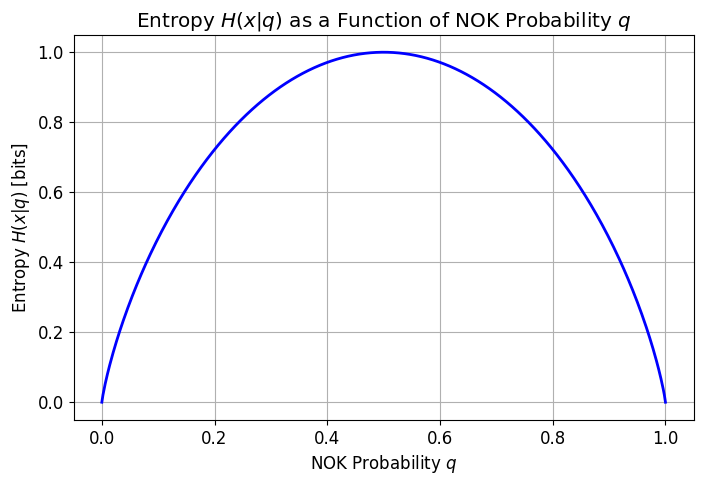

In [12]:
"""C) For the above example, i.e. 100 devices and N=10000, write down the mathematical formula for probability mass function of x as a function of "NOK" probability q,
    i.e. p(x(q))=p(x|q)=? Then derive and write down the formula for Shannon entropy of x as a function of q, i.e., H(x|q)=?
    (present your whole derivation, though it is short), calculate and plot H(x(q))=H(x|q) [bit]."""

"""Each check result x is a Bernoulli random variable:
    x=1 with probability q (failure),
    x=0 with probability 1−q (pass).
    Thus, the probability mass function for x is:
    p(x∣q)={1−q    if x=0
            q      if x=1}
  The Shannon entropy for a binary random variable x with probabilities p(x=0)=1−q and p(x=1)=q is given by:
      H(x∣q)=− x∈{0,1} ∑p(x∣q)⋅log2(p(x∣q))
      Expanding this sum with p(x=0)=1−q and p(x=1)=q:
      H(x∣q)=−(1−q)⋅log2(1−q)−q⋅log2(q)"""

# Define function for entropy H(x|q) given q
def entropy_x_given_q(q):
    if q == 0 or q == 1:
        return 0
    return -( (1 - q) * np.log2(1 - q) + q * np.log2(q) )

# Generate values of q from 0 to 1
q_values = np.linspace(0, 1, 500)
entropy_values = [entropy_x_given_q(q) for q in q_values]

# Plot entropy H(x|q) as a function of q
plt.figure(figsize=(8, 5))
plt.plot(q_values, entropy_values, color='blue', linewidth=2)
plt.title("Entropy $H(x|q)$ as a Function of NOK Probability $q$")
plt.xlabel("NOK Probability $q$")
plt.ylabel("Entropy $H(x|q)$ [bits]")
plt.grid(True)
plt.show()


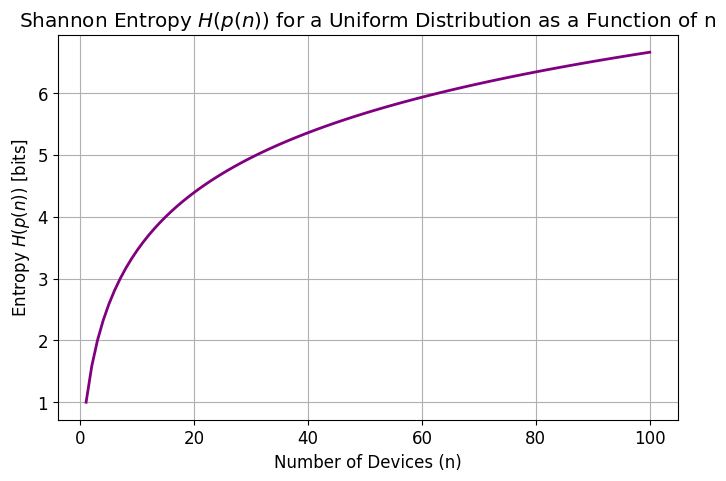

In [15]:
""" 3) Let's denote  n  the number of network devices, and where  x  is the count of "NOK" devices during a single check batch.
      Let's imagine that the probability of  x  is a constant (i.e.  x  has the uniform distribution):
      A) How much is  p(x)  and how much is  H(x)  [bit] for  n  in general? """

"""Probability of each outcome p(x): 1/n+1
      Entropy H(x) in bits:log2(n+1) """

"""  B) Derive and plot the Shannon entropy of the uniform distribution as function of the number of the devices  n , i.e,plot  H(p(n))  for  n=1,2,3,4,...,100? """
import numpy as np
import matplotlib.pyplot as plt

# Define range of n values
n_values = np.arange(1, 101)

# Calculate entropy H(p(n)) for each n using the formula H = log2(n + 1)
entropy_values = np.log2(n_values + 1)

# Plot the entropy H(p(n)) as a function of n
plt.figure(figsize=(8, 5))
plt.plot(n_values, entropy_values, color='purple', linewidth=2)
plt.title("Shannon Entropy $H(p(n))$ for a Uniform Distribution as a Function of n")
plt.xlabel("Number of Devices (n)")
plt.ylabel("Entropy $H(p(n))$ [bits]")
plt.grid(True)
plt.show()


## 2-D Shannon Entropy  (of an image)

To calculate the Shannon entropy of a 2D image represented by coordinates (x, y), you'll need to first discretize the image into discrete bins and then use the Shannon entropy formula.

$H = -\sum_{i=1}^{N}\sum_{j=1}^{M} p(x_i, y_j) \log_2(p(x_i, y_j)$


First, define the discrete bins for the image. Let's assume you divide the image into N bins in the x-direction and M bins in the y-direction, resulting in a total of N x M bi#ns.

## 2-D Shannon Entropy of an image via 2D-FFT
I(x,y) can be estimated using the 2D FFT

$H = -\sum_{f_x}\sum_{f_y} P(f_x, f_y) \log_2(P(f_x, f_y))$

Where:
-$f_x$ and $f_y$ represent the spatial frequencies in the x and y directions.
- $P(f_x, f_y)$ is the power spectrum of the image, which can be calculated as the square of the magnitude of the 2D FFT of the image:
where $F(i, j)$ is the 2D FFT of the image.
$$P(f_x, f_y) = |F(i, j)|^2 $$
The summation is over all possible values of frequencies $i$ and $j$ via 2-D FFT.

Shannon Entropy: 5.9051


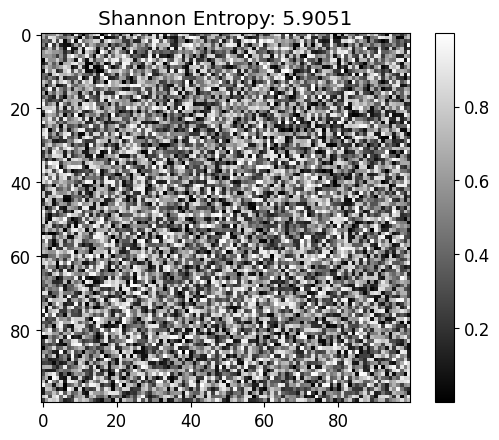

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def shannon_entropy(image_data, bins_x, bins_y):
    # Create a 2D histogram to count the number of points in each bin
    Counts, x_edges, y_edges = np.histogram2d(image_data[:,0], image_data[:,1], bins=(bins_x, bins_y))

    # Convert the counts to probabilities
    total_points = np.sum(Counts)
    probabilities = Counts / total_points

    # Calculate Shannon entropy
    entropy = -np.sum(probabilities * np.log2(probabilities + (probabilities == 0)))

    return entropy

def generate_noise_image(width, height):
    # Generate a random noise image with values between 0 and 1
    noise_image = np.random.rand(width, height)
    return noise_image

# Generate a 100x100 random noise image
image_width = 100
image_height = 100
noise_image = generate_noise_image(image_width, image_height)

# Calculate Shannon entropy
bins_x = 10  # Number of bins in the x-direction
bins_y = 10  # Number of bins in the y-direction

entropy = shannon_entropy(noise_image, bins_x, bins_y)
print(f"Shannon Entropy: {entropy:.4f}")

# Display the noise image
plt.imshow(noise_image, cmap='gray')
plt.title(f"Shannon Entropy: {entropy:.4f}")
plt.colorbar()
plt.show()


## Example L10
- Calculate Shannon Entropy convetionaly and via 2-D FFT both for several of your own images that you generate and compare the results  <b style="color:blue;">[0.5 Points]</b>

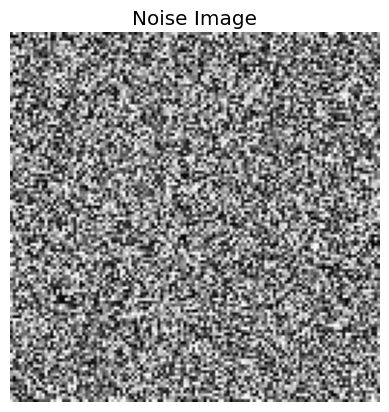

Noise Image - Conventional Entropy: 7.9845, FFT Entropy: 13.6986


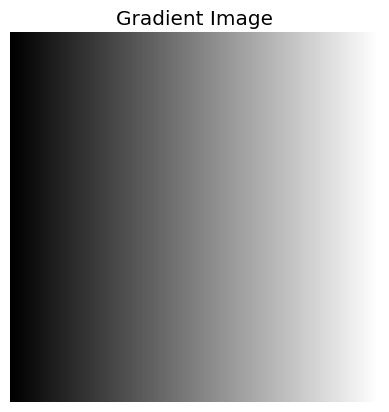

Gradient Image - Conventional Entropy: 7.0000, FFT Entropy: 5.3476


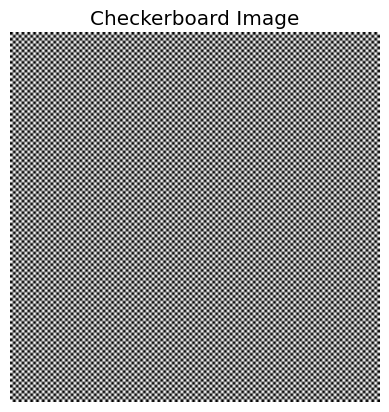

Checkerboard Image - Conventional Entropy: 1.0000, FFT Entropy: 1.0000
Noise Image - Conventional Entropy: 7.9845, FFT Entropy: 13.6986
Gradient Image - Conventional Entropy: 7.0000, FFT Entropy: 5.3476
Checkerboard Image - Conventional Entropy: 1.0000, FFT Entropy: 1.0000


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2
from skimage.util import img_as_ubyte
from scipy.stats import entropy

# Define conventional entropy calculation function
def calculate_entropy(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0, 256), density=True)
    histogram = histogram[histogram > 0]  # Filter out zero probabilities
    return -np.sum(histogram * np.log2(histogram))

# Define entropy calculation function via 2D FFT
def calculate_fft_entropy(image):
    fft_image = fft2(image)
    magnitude_spectrum = np.abs(fft_image)
    normalized_magnitude = magnitude_spectrum / np.sum(magnitude_spectrum)  # Normalize to get a probability distribution
    flattened_magnitude = normalized_magnitude.flatten()
    flattened_magnitude = flattened_magnitude[flattened_magnitude > 0]  # Filter out zero probabilities
    return -np.sum(flattened_magnitude * np.log2(flattened_magnitude))

# Generate example images: noise, gradient, and checkerboard patterns
#Generates a noise image, a gradient, and a checkerboard pattern, each representing different levels of structure and randomness.
def generate_images(width, height):
    images = {
        "Noise": np.random.rand(width, height),
        "Gradient": np.tile(np.linspace(0, 1, width), (height, 1)),
        "Checkerboard": np.kron([[0, 1] * (width // 2), [1, 0] * (width // 2)] * (height // 2), np.ones((1, 1)))
    }
    return images

# Image dimensions
width, height = 128, 128

# Generate images
images = generate_images(width, height)

# Calculate and compare entropy values
results = {}
for name, image in images.items():
    conv_entropy = calculate_entropy(img_as_ubyte(image))  # Convert to 8-bit grayscale for calculation
    fft_entropy = calculate_fft_entropy(image)
    results[name] = (conv_entropy, fft_entropy)

    # Display the images and print entropy results
    plt.imshow(image, cmap='gray', vmin=0, vmax=1)
    plt.title(f"{name} Image")
    plt.axis('off')
    plt.show()
    print(f"{name} Image - Conventional Entropy: {conv_entropy:.4f}, FFT Entropy: {fft_entropy:.4f}")

# Results comparison
for name, (conv_entropy, fft_entropy) in results.items():
    print(f"{name} Image - Conventional Entropy: {conv_entropy:.4f}, FFT Entropy: {fft_entropy:.4f}")


Noise Image: High entropy for both methods, as randomness is high in both pixel intensities and frequencies.

Gradient Image: Moderate entropy in the pixel domain, lower entropy in the FFT domain due to low-frequency dominance.

Checkerboard Pattern: High entropy in both domains, though FFT entropy may differ slightly based on the frequency structure.

<div style="widht:100%;height:5px;background-color:#408d62"></div>
<h2>Points and Assigments (week 4):</h2>

If you wish to submit your solutions to collect your optional points, solve the problems in this notebook directly and upload to Moodle within 2 weeks.

In this notebook, you may collect maximum of 3 points (though the total sum of points available in this notebook is more).


<div style="widht:100%;height:5px;background-color:#408d62"></div>
<h3> References </h3>
<br>


<hr>
<div style="width:100%;">
<div style="width:5%;float:left;">[$\alpha$] </div>
<div style="width:95%;float:left;align:justify;"> “Random sampling (numpy.random) — NumPy v1.16 Manual.” <a href="https://numpy.org/doc/1.16/reference/routines.random.html">https://numpy.org/doc/1.16/reference/routines.random.html .
 </div></div>


<div style="width:100%;">
<div style="width:5%;float:left;">[a] </div>
<div style="width:95%;float:left;align:justify;">“Randomized Designs — pyDOE 0.3.6 documentation.” https://pythonhosted.org/pyDOE/randomized.html.
 </div></div>

<div style="width:100%;">
<div style="width:5%;float:left;">[b] </div>
<div style="width:95%;float:left;align:justify;">“Kernel density estimation via the Parzen-Rosenblatt window method,” Dr. Sebastian Raschka, Jun. 19, 2014. https://sebastianraschka.com/Articles/2014_kernel_density_est.html.
 </div></div>


<div style="width:100%;">
<div style="width:5%;float:left;">[c] </div>
<div style="width:95%;float:left;align:justify;"> B. Allen, B. Stacey, and Y. Bar-Yam, “Multiscale Information Theory and the Marginal Utility of Information,” Entropy, vol. 19, no. 6, p. 273, Jun. 2017, doi: 10.3390/e19060273.
 </div></div>


<div style="width:100%;">
<div style="width:5%;float:left;">[d] </div>
<div style="width:95%;float:left;align:justify;">J. Brownlee, “Information Gain and Mutual Information for Machine Learning,” Machine Learning Mastery, Oct. 15, 2019. https://machinelearningmastery.com/information-gain-and-mutual-information/
 </div></div>


<hr>
<div style="width:100%;">
<div style="width:5%;float:left;">[e] </div>
<div style="width:95%;float:left;align:justify;"> A. Humeau-Heurtier, “Texture Feature Extraction Methods: A Survey,” IEEE Access, vol. 7, pp. 8975–9000, 2019, doi: 10.1109/ACCESS.2018.2890743.
 </div></div>

<hr>
<div style="width:100%;">
<div style="width:5%;float:left;">[f] </div>
<div style="width:95%;float:left;align:justify;"> “Statistical functions (scipy.stats) — SciPy v1.7.1 Manual.” https://docs.scipy.org/doc/scipy/reference/stats.html.
 </div></div>

<hr>
<div style="width:100%;">
<div style="width:5%;float:left;">[g] </div>
<div style="width:95%;float:left;align:justify;"> “Freedman–Diaconis rule,” Wikipedia. Mar. 21, 2021. Accessed: Nov. 02, 2021. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Freedman%E2%80%93Diaconis_rule&oldid=1013411616.
 </div></div>
    
<hr>

<b>Basic Reading:</b>

<div style="width:100%;">
<div style="width:5%;float:left;">[1] </div>
<div style="width:95%;float:left;align:justify;">MACKAY, David J. C. Information theory, inference, and learning algorithms. Cambridge: Cambridge University Press, 2003. ISBN 978-0-521-64298-9. <a href="https://www.inference.org.uk/itprnn/book.pdf">(online for screen viewing, i.e., use as the pdf: https://www.inference.org.uk/itprnn/book.pdf)</a> and <a href="http://videolectures.net/course_information_theory_pattern_recognition/">video lectures by David MacKay </a>
 </div></div>



<b>Recommended Reading: </b>

[2] COVER, T. M. and Joy A. THOMAS. Elements of information theory. 2nd ed. Hoboken: Wiley-Interscience, c2006. ISBN 978-0-471-24195-9..<br>
[3] HOST, S. Information and Communication Theory. Hoboken, NJ: Wiley-IEEE Press, 2019. ISBN 978-1119433781..<br>
[4] EL-GAMAL, A. and YOUNG-HAN, K. Network information theory. Primera. Cambridge: Cambridge University Press, 2011. ISBN 978-1-107-00873-1..

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>



<br>

<div style="width:100%;height:20px;background-color:#408d62"></div>
<br>

<div style="width:100%;height:30px">
<div style="width:70%;height:30px;float:left;text-align:center;font-size:10px">&#169;  Ivo Bukovsky, Dpt. of Comp. Sci., USB in CB, 2021 </div>
<div style="width:30%;height:30px;float:left;"><img src="img/JCU_DCS.png" style="height:30px;"/> </div>
</div>


